In [1]:
from scipy.optimize import root, minimize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
C = [
 [9.9068, 7.4296,-5.3985,20.222],
 [8.8226,0.8404,1.8736,-21.6135],
#  [8.1358,0.0283,-0.1005,-21.509],
 [-1.7352,-4.7506,9.3576,5.6601]
]
T = 180+273.15
def lhK(T,i):
    C1 = 10**3
    C2 = 10**-2
    C3 = 10**-3
    term1 = C[i][0]*C1/T
    term2 = C[i][1]*C2*np.log(T)
    term3 = C[i][2]*C3*T
    term4 = C[i][3]
    return np.exp(term1+term2+term3+term4)
K = [lhK(T, i) for i in range(3)]
K

[2.5810870251924829e+17, 0.28834832096389584, 323.99999820141301]

In [3]:
x0 = {"CO2":0.0631,"NH3":0.5338,"H2NCOO":0,"NH4":0,"H2O":0.27,"HCO3":0,"H2NCONH2":0.1331}
def eqns(x):
    e1,e2,e3 = x
    T = 465.882732733
#     T = 200+273.15
    K = [lhK(T, i) for i in range(3)]
    F0 = (1E6/60.06 - e3)/0.1331 #mol/day
    F = {"CO2":0.0631*F0 - e1 - e2,"NH3":0.5338*F0 - 2*e1 - e2,
         "H2NCOO":e1-e3,"NH4":e1+e2-e3,"H2O":0.27*F0 - e2 + e3,"HCO3":e2,"H2NCONH2":1E6/60.06}
    eqn1 = K[0]*((F["NH3"]**2)*F["CO2"]) - F["NH4"]*F["H2NCOO"]
    eqn2 = K[1]*(F["NH3"]*F["CO2"]*F["H2O"]) - F["NH4"]*F["HCO3"]
    eqn3 = K[2]*(F["NH4"]*F["H2NCOO"]) - F["H2O"]*F["H2NCONH2"]

    return eqn1,eqn2,eqn3

sol = root(eqns,[100,101,102],method="lm")

sol.x,np.log(np.sum(np.abs(sol.fun)))

(array([  5.70628386e+03,  -9.51815718e-10,   4.61346543e+03]),
 32.101602849833135)

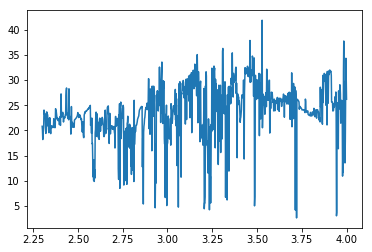

In [4]:
x0 = {"CO2":0.0631,"NH3":0.5338,"H2NCOO":0,"NH4":0,"H2O":0.27,"HCO3":0,"H2NCONH2":0.1331}
def eqns1(x,W):
    e1,e2,e3,T = x
    K = [lhK(T, i) for i in range(3)]
    F0 = (1E6/60.06 - e3)/0.1331 #mol/day
    F = {"CO2":0.0631*F0 - e1 - e2,"NH3":0.5338*F0 - 2*e1 - e2,
         "H2NCOO":e1-e3,"NH4":e1+e2-e3,"H2O":0.27*F0 - e2 + e3,"HCO3":e2,"H2NCONH2":1E6/60.06}
    eqn1 = K[0]*((F["NH3"]**2)*F["CO2"]) - F["NH4"]*F["H2NCOO"]
    eqn2 = K[1]*(F["NH3"]*F["CO2"]*F["H2O"]) - F["NH4"]*F["HCO3"]
    eqn3 = K[2]*(F["NH4"]*F["H2NCOO"]) - F["H2O"]*F["H2NCONH2"]
    eqn4 = W*F["CO2"] - F["NH3"]

    return eqn1,eqn2,eqn3,eqn4
W = np.linspace(2.3,4,1000)
err = 0*W
# err[-1] = np.inf
for i in range(len(W)):
    err[i] = np.sum(np.abs(root(lambda x: eqns1(x,W[i]),[100,101,102,170+273.15],method="lm").fun))
#     if err[i] > 10*err[i-1]:
#         err[i] = err[i-1]
plt.plot(W,np.log(err))
plt.show()


In [5]:
def eqns1(x):
    e1,e2,e3,T = x
    K = [lhK(T, i) for i in range(3)]
    F0 = (1E6/60.06 - e3)/0.1331 #mol/day
    F = {"CO2":0.0631*F0 - e1 - e2,"NH3":0.5338*F0 - 2*e1 - e2,
         "H2NCOO":e1-e3,"NH4":e1+e2-e3,"H2O":0.27*F0 - e2 + e3,"HCO3":e2,"H2NCONH2":1E6/60.06}
    eqn1 = K[0]*((F["NH3"]**2)*F["CO2"]) - F["NH4"]*F["H2NCOO"]
    eqn2 = K[1]*(F["NH3"]*F["CO2"]*F["H2O"]) - F["NH4"]*F["HCO3"]
    eqn3 = K[2]*(F["NH4"]*F["H2NCOO"]) - F["H2O"]*F["H2NCONH2"]
    eqn4 = 3.72092092092*F["CO2"] - F["NH3"]

    return eqn1,eqn2,eqn3,eqn4
sol = root(eqns1,[100,101,102,170+273.15],method="lm")
print(f"{sol.x},{np.sum(np.abs(sol.fun)):}")

[ 39944.76434493 -34589.94348308   5354.8207717    1643.48342137],21.44992635088338


In [6]:
print(W[np.argmin(err)])

3.72092092092


In [7]:
def molar_fractions(x):
    e1,e2,e3 = x
    F0 = (1E6/60.06 - e3)/0.1331 #mol/day
    F = {"CO2":0.0631*F0 - e1 - e2,"NH3":0.5338*F0 - 2*e1 - e2,
         "H2NCOO":e1-e3,"NH4":e1+e2-e3,"H2O":0.27*F0 - e2 + e3,"HCO3":e2,"H2NCONH2":1E6/60.06}
    x = {}
    for key,value in F.items():
        x[key] = value/sum(F.values())
    return x

In [8]:
xf = molar_fractions(sol.x)
print(xf)
np.sum(list(xf.values()))

ValueError: too many values to unpack (expected 3)

In [ ]:
# K = np.exp(np.array([-2657703.08858974,   403435.21123485, -3022561.17610593]))
x0 = {"CO2":0.0631,"NH3":0.5338,"H2NCOO":0,"NH4":0,"H2O":0.27,"HCO3":0,"H2NCONH2":0.1331}
def eqns(x,W):
    e1,e2,e3,T = x
    K = [lhK(T, i) for i in range(3)]
    K = [K[2],K[0],K[1]]
    F0 = (1E6/60.06 - e1)/0.1331 #mol/day
    F = {"CO2":0.0631*F0 - e1 - e2 - e3,"NH3":0.5338*F0 - 2*e1 - 2*e2 - e3,
         "NH2COONH4":e2,"H2O":0.27*F0 + e1 - e3,"(NH2)2CO":1E6/60.06,"NH4HCO3":e3}
    eqn1 = K[0]*((F["NH3"]**2)*F["CO2"]) - F["H2O"]*F["(NH2)2CO"]
    eqn2 = K[1]*((F["NH3"]**2)*F["CO2"]) - F["NH2COONH4"]
    eqn3 = K[2]*(F["NH3"]*F["CO2"]*F["H2O"]) - F["NH4HCO3"]
    eqn4 = W*F["CO2"] - F["NH3"]
    return eqn1,eqn2,eqn3,eqn4

W = np.linspace(2.3,4,1000)
err = 0*W
for i in range(len(W)):
    err[i] = np.sum(np.abs(root(lambda x: eqns(x,W[i]),[100,101,102,170+273.15],method="lm").fun))
plt.plot(W,np.log(err))
plt.show()

In [ ]:
def molar_fractions(x):
    e1,e2,e3 = x
    F0 = (1E6/60.06 - e1)/0.1331 #mol/day
    F = {"CO2":0.0631*F0 - e1 - e2 - e3,"NH3":0.5338*F0 - 2*e1 - 2*e2 - e3,
         "NH2COONH4":e2,"H2O":0.27*F0 + e1 - e3,"(NH2)2CO":1E6/60.06,"NH4HCO3":e3}
    x = {}
    for key,value in F.items():
        x[key] = value/sum(F.values())
    return x
molar_fractions(sol.x)

In [ ]:
print(W[np.argmin(err)])

In [ ]:
x0 = {"CO2":0.0631,"NH3":0.5338,"H2NCOO":0,"NH4":0,"H2O":0.27,"HCO3":0,"H2NCONH2":0.1331}
def eqns(x):
    e1,e2,e3,T = x
    K = [lhK(T, i) for i in range(3)]
    K = [K[2],K[0],K[1]]
    F0 = (1E6/60.06 - e1)/0.1331 #mol/day
    F = {"CO2":0.0631*F0 - e1 - e2 - e3,"NH3":0.5338*F0 - 2*e1 - 2*e2 - e3,
         "NH2COONH4":e2,"H2O":0.27*F0 + e1 - e3,"(NH2)2CO":1E6/60.06,"NH4HCO3":e3}
    eqn1 = K[0]*((F["NH3"]**2)*F["CO2"]) - F["H2O"]*F["(NH2)2CO"]
    eqn2 = K[1]*((F["NH3"]**2)*F["CO2"]) - F["NH2COONH4"]
    eqn3 = K[2]*(F["NH3"]*F["CO2"]*F["H2O"]) - F["NH4HCO3"]
    eqn4 = 2.31871871872*F["CO2"] - F["NH3"]
    return eqn1,eqn2,eqn3,eqn4

sol = root(eqns,[100,101,102,170+273.15],method="lm")


In [ ]:
np.sum(np.abs(sol.fun))

In [ ]:
x0 = {"CO2":0.0631,"NH3":0.5338,"H2NCOO":0,"NH4":0,"H2O":0.27,"HCO3":0,"H2NCONH2":0.1331}
def eqns(x,T):
    e1,e2,e3 = x
#     T = 200+273.15
    K = [lhK(T, i) for i in range(3)]
    F0 = (1E6/60.06 - e3)/0.1331 #mol/day
    F = {"CO2":0.0631*F0 - e1 - e2,"NH3":0.5338*F0 - 2*e1 - e2,
         "H2NCOO":e1-e3,"NH4":e1+e2-e3,"H2O":0.27*F0 - e2 + e3,"HCO3":e2,"H2NCONH2":1E6/60.06}
    eqn1 = K[0]*((F["NH3"]**2)*F["CO2"]) - F["NH4"]*F["H2NCOO"]
    eqn2 = K[1]*(F["NH3"]*F["CO2"]*F["H2O"]) - F["NH4"]*F["HCO3"]
    eqn3 = K[2]*(F["NH4"]*F["H2NCOO"]) - F["H2O"]*F["H2NCONH2"]

    return eqn1,eqn2,eqn3
T = np.linspace(170+273.15, 200+273.15,1000)
err = 0*T
for i in range(len(T)):
    err[i] = np.sum(np.abs(root(lambda x: eqns(x,T[i]),[100,101,102],method="lm").fun))

plt.plot(T,np.log(err))
plt.show()

In [ ]:
print(T[np.argmin(err[np.argmin(err)+1:])])

In [10]:
x0 = {"CO2":0.0631,"NH3":0.5338,"H2NCOO":0,"NH4":0,"H2O":0.27,"HCO3":0,"H2NCONH2":0.1331}
W = 2.3
def eqns(x):
    e1,e2,FNH30,FCO20 = x
#     T = 465.882732733
    T = 200+273.15
    K = [lhK(T, i) for i in range(3)]
    e3 = 1E6/60.06
    F = {"CO2":FCO20 - e1 - e2,"NH3":FNH30 - 2*e1 - e2,
         "H2NCOO":e1-e3,"NH4":e1+e2-e3,"H2O": - e2 + e3,"HCO3":e2,"H2NCONH2":1E6/60.06}
    eqn1 = K[0]*((F["NH3"]**2)*F["CO2"]) - F["NH4"]*F["H2NCOO"]
    eqn2 = K[1]*(F["NH3"]*F["CO2"]*F["H2O"]) - F["NH4"]*F["HCO3"]
    eqn3 = K[2]*(F["NH4"]*F["H2NCOO"]) - F["H2O"]*F["H2NCONH2"]
    eqn4 = FNH30 - W*FCO20

    return eqn1,eqn2,eqn3,eqn4

sol = root(eqns,[100,101,102,103],method="lm")

sol.x,np.log(np.sum(np.abs(sol.fun)))

(array([ 16103.30980316,  -2381.182004  ,  29825.43788347,  12389.23341272]),
 29.905296157217606)

In [ ]:
def molar_fractions(x):
    e1,e2,e3 = x
    e3 = 1E6/60.06
    F = {"CO2":FCO20 - e1 - e2,"NH3":FNH30 - 2*e1 - e2,
         "H2NCOO":e1-e3,"NH4":e1+e2-e3,"H2O": - e2 + e3,"HCO3":e2,"H2NCONH2":1E6/60.06}
    x = {}
    for key,value in F.items():
        x[key] = value/sum(F.values())
    return x
molar_fractions(sol.x)